## Linear Regression and Lasco and Ridge 

In [4]:
import pandas as pd 
df=pd.read_csv('housing.csv')
df.head(10)

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
5,5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0.5
6,6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0.5
7,7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0.0
8,8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1.0
9,9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0.0


In [6]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [60]:
# Dividing the Dataset into Independent and Dependent 

X = df.drop(['price'],axis=1)
y= df['price']

In [61]:
# Training and Test Data seperation 

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)

print(f"df size: {df.shape}")
print(f"X_trian size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_trian size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")
      


df size: (545, 14)
X_trian size: (408, 13)
X_test size: (137, 13)
y_trian size: (408,)
y_test size: (137,)


In [62]:
# Standardising the DataSet
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [64]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
# Crossvaldidation
from sklearn.model_selection import cross_val_score
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [96]:
mse=cross_val_score(linear_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mean_mse =np.mean(mse)
mean_mse

-394377524846.1004

In [77]:
# Predicting the model using Linear Regression 
reg_predict=linear_reg.predict(X_test)
reg_predict

array([4677517.09396116, 7130262.75930589, 3566701.34762613,
       6355539.05049332, 2260920.27040394, 5083524.23943666,
       5828464.86203757, 5099485.29607094, 2232045.94204532,
       2958028.38089978, 8601240.75721892, 2271031.86679548,
       3224038.28012862, 3019893.79352125, 1960431.27654537,
       3163868.50260811, 2248413.76602332, 6860512.62287613,
       2653727.71150117, 2432485.66262926, 6797082.36796552,
       5675883.51968938, 1870997.48764742, 5527531.16684428,
       4546182.17906239, 7967472.78291747, 2457339.58107764,
       5547618.2021902 , 7711145.20910149, 2136005.35944001,
       7013567.87198904, 3352639.20928725, 6904985.60838959,
       2522313.00066012, 2963667.95023147, 4926529.98794011,
       5197945.46114441, 2988039.17332693, 3458833.85530396,
       2397304.1844827 , 5849793.64819569, 3643519.92090753,
       7137102.01068914, 5258827.90157058, 2790981.2021772 ,
       4911297.05256776, 7005463.54381773, 5852878.6887181 ,
       2637714.41534129,

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


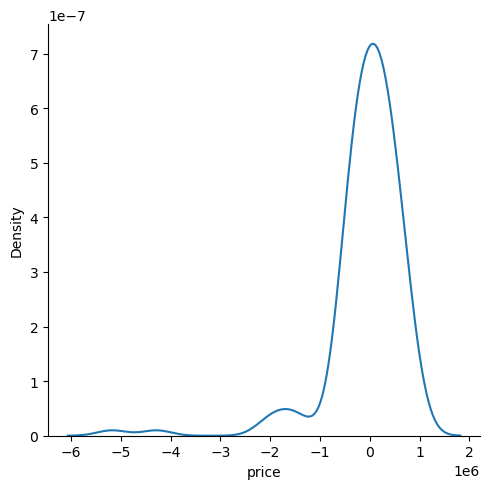

In [78]:
sns.displot(reg_predict-y_test,kind='kde')

In [97]:
from sklearn.metrics import r2_score
score= r2_score(reg_predict,y_test)
score

0.8304216950405595

In [91]:
# Ridge regression:-
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge= Ridge()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20]}

ridge_reg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20]},
             scoring='neg_mean_squared_error')

In [94]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.01}
-394377138044.225


In [101]:
ridge_predict=ridge_reg.predict(X_test)
score= r2_score(ridge_predict,y_test)
score

0.8304131800544865

In [89]:
# Lasso regression:-
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso= Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20]}

lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)
lasso_reg.fit(X_train,y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e+13, tolerance: 1.130e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.918e+13, tolerance: 1.008e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.646e+13, toleranc

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20]},
             scoring='neg_mean_squared_error')

In [93]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 20}
-394372122260.9306


In [98]:
# Predicting the model using Lasso
lasso_predict=lasso_reg.predict(X_test)
lasso_predict

array([4677445.84882046, 7130136.61965573, 3566736.81734213,
       6355538.35140579, 2261070.4274249 , 5083555.05674878,
       5828474.83645758, 5099603.32751897, 2231997.97573708,
       2958069.7825683 , 8601011.75656801, 2271046.39400644,
       3223898.0017893 , 3019884.68202052, 1960502.7346955 ,
       3163783.26498313, 2248446.93038403, 6860447.44735567,
       2653760.87667929, 2432517.54595842, 6796908.27860904,
       5675914.85273703, 1871018.23968559, 5527539.67577902,
       4546210.1845228 , 7967329.054953  , 2457438.02625811,
       5547752.33645703, 7711016.87388977, 2136066.8225872 ,
       7013477.79726519, 3352666.98294118, 6904997.03915505,
       2522374.05111255, 2963769.88118865, 4926491.64432968,
       5198040.18745065, 2988136.93178879, 3458759.10372675,
       2397458.48764827, 5849808.15663781, 3643487.48253069,
       7136976.41572865, 5258897.81792225, 2791003.71269734,
       4911217.64488186, 7005347.81638878, 5852970.45270162,
       2637693.66428381,

C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


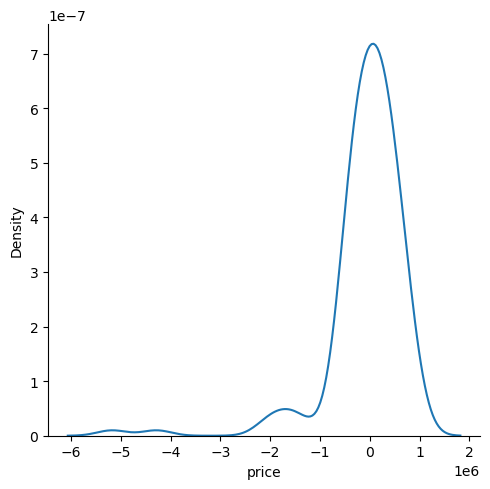

In [99]:
sns.displot(lasso_predict-y_test,kind='kde')

In [100]:
score= r2_score(lasso_predict,y_test)
score

0.83041216571233

# Logistic Regression 



In [102]:
from sklearn.linear_model import LogisticRegression

In [104]:
from sklearn.datasets import load_breast_cancer

In [107]:
df=load_breast_cancer()

In [109]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [115]:
# Independent feautures 
X=pd.DataFrame(df['data'],columns=df['feature_names'])

In [116]:
X.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [118]:
# Dependent Feauture 
y=pd.DataFrame(df['target'],columns=['Target'])

In [119]:
y.head(10)

,Target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [120]:
y['Target'].value_counts()  # check the imbalncing=f of the data 

Target
1    357
0    212
Name: count, dtype: int64

In [123]:
# Training and Test Data seperation 

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=42)

print(f"X_trian size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_trian size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")

X_trian size: (381, 30)
X_test size: (188, 30)
y_trian size: (381, 1)
y_test size: (188, 1)


In [145]:
params = [{'C':[1,5,10]},{'max_iter':[100,150]}]

In [146]:
model1=LogisticRegression(C=100,max_iter=100)

In [147]:
grid_model= GridSearchCV(model1,param_grid=params,scoring='f1',cv=5)

In [148]:
grid_model.fit(X_train,y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [149]:
grid_model.best_params_

{'max_iter': 150}

In [150]:
grid_model.best_score_

0.9555427416687288

In [151]:
y_pred=grid_model.predict(X_test)

In [152]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [158]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [156]:
confusion_matrix(y_pred,y_test)

array([[ 64,   3],
       [  3, 118]], dtype=int64)

In [159]:
accuracy_score(y_test,y_pred)

0.9680851063829787

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

